**Blood Cell Images Classification**

by. Haikal Ramadhan Usman

Tujuan dari analysis ini adalah untuk menglasifikasikan gambar sel darah. Jenis-jenis sel datrah yang digunakan disini terbagi dalam 4 kelas yaitu Eosinophil, Lymphocyte, Monocyte, dan Neutrophil. Untuk karakteristik setiap sel akan kita lihat pada proses EDA. 

Dataset yang digunakan dapat dilihat di https://www.kaggle.com/paultimothymooney/blood-cells

# Import Library

Import seluruh library yang akan dipakai:

* pandas: untuk loading, manipulasi dan preprocessing dataset
* numpy: untuk perhitungan numerik
* seaborn: untuk memvisualisasikan data
* matplotlib: digunakan untuk memvisualisasikan data
* pathlib: untuk loading path
* PIL: untuk memproses gambar
* tensorflow dan keras: untuk melakukan pemodelan
* ImageDataGenerator, img_to_array, load_img, array_to_img: untuk proses gambar
* image_dataset_from_directory: untuk loading image dari directory

In [1]:
import pandas as pd
import numpy as np
import pathlib
from pathlib import Path
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import matplotlib.pyplot as plt

# Data Loading

In [66]:
train = r'C:\Users\haika\HACKTIV8\Milestone 2 phase 2\dataset2-master\dataset2-master\images\TRAIN'
test = r'C:\Users\haika\HACKTIV8\Milestone 2 phase 2\dataset2-master\dataset2-master\images\TEST'
pred = r'C:\Users\haika\HACKTIV8\Milestone 2 phase 2\dataset2-master\dataset2-master\images\VALIDATION'
data_dir = Path(train)
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)

9945


# EDA

## EOSINOPHIL

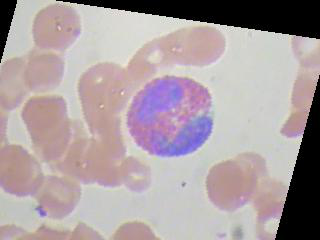

In [117]:
EOSINOPHIL = list(data_dir.glob('EOSINOPHIL/*'))
PIL.Image.open(EOSINOPHIL[0])

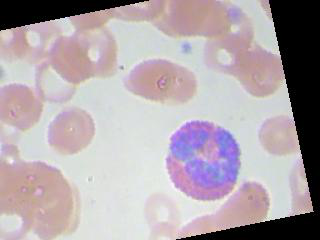

In [119]:
PIL.Image.open(EOSINOPHIL[1])

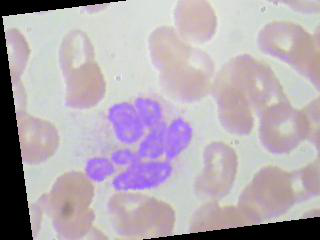

In [120]:
PIL.Image.open(EOSINOPHIL[2])

Dari yang saya lihat, karakteristik EOSINOPHIL ini dikelilingi oleh seldarah merah. Jadi kalo dilihat digambar, selain berwarna biru juga bercampur dengan warna merah

## LYMPHOCYTE

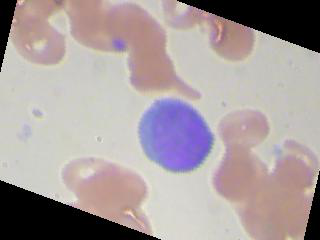

In [121]:
LYMPHOCYTE = list(data_dir.glob('LYMPHOCYTE/*'))
PIL.Image.open(LYMPHOCYTE[0])

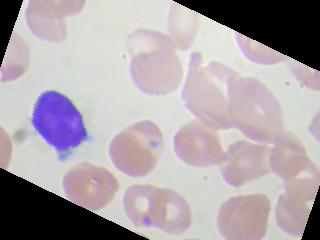

In [122]:
PIL.Image.open(LYMPHOCYTE[1])

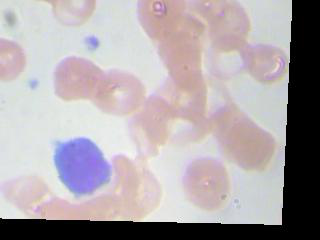

In [123]:
PIL.Image.open(LYMPHOCYTE[2])

Karakteristik dari LYMPHOCYTE ini dipenuhi oleh warna biru

## MONOCYTE

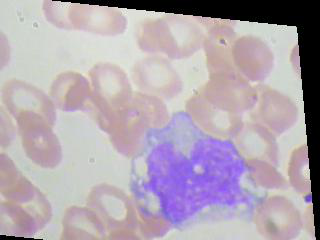

In [124]:
MONOCYTE = list(data_dir.glob('MONOCYTE/*'))
PIL.Image.open(MONOCYTE[0])

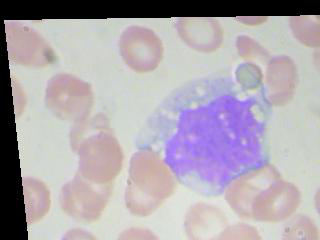

In [125]:
PIL.Image.open(MONOCYTE[2])

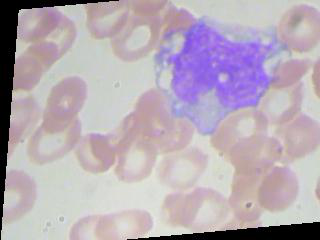

In [126]:
PIL.Image.open(MONOCYTE[3])

Karakteristik dari MONOCYTE yaitu dia memiliki inti sel. Pada gambar diatas inti sel tersebut berwarna biru

## NEUTROPHIL

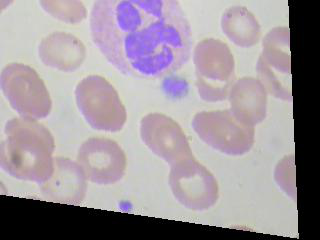

In [127]:
NEUTROPHIL = list(data_dir.glob('NEUTROPHIL/*'))
PIL.Image.open(NEUTROPHIL[0])

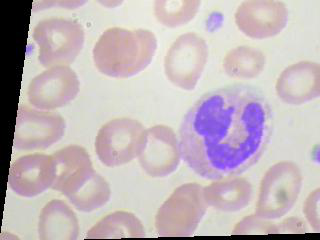

In [128]:
PIL.Image.open(NEUTROPHIL[1])

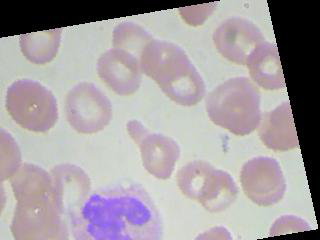

In [129]:
PIL.Image.open(NEUTROPHIL[2])

NEUTROPHIL memiliki karakteristik di mana NEUTROPHIL memiliki tiga lobus nukleus.

# Data Preprocessing

In [71]:
#btc_size = 10
im_height = 180
im_width = 180

In [72]:
train_dataset = image_dataset_from_directory(
    train,
    shuffle=True,
    image_size=(im_height, im_width)
    )

Found 9945 files belonging to 4 classes.


In [73]:
val_dataset = image_dataset_from_directory(
  pred,
  image_size=(im_height, im_width),
)

Found 2487 files belonging to 4 classes.


In [74]:
kelas = train_dataset.class_names
print(kelas)

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


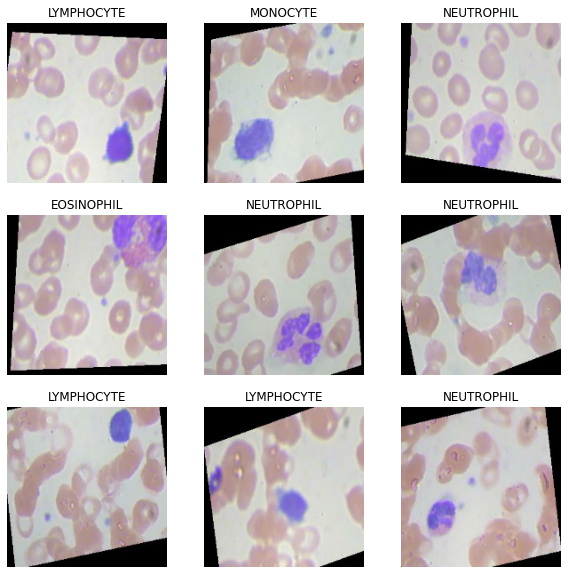

In [76]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(kelas[labels[i]])
    plt.axis("off")

Sel berwarna merah yang ada disekitar sel berwarna biru adalah sel darah merah

In [77]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_data = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

**Standarisasi data agar bernilai [0, 1]:**

In [80]:
normalization_layer = keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_dataset))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9715686


# Model Definition

In [85]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

## Create Model

Saya akan menggunakan GlorotNormal dan activation nya relu sementara pada layout activation nya menggunakan softmax


In [86]:
def layers(weight_init=tf.keras.initializers.GlorotNormal(),hidden_act_func='relu'):
  model = keras.models.Sequential()
 
  #input layers
  model.add(keras.layers.InputLayer(input_shape=(im_height,im_width, 3)))
    
  #hidden layers
  model.add(keras.layers.Conv2D(16, 3, padding='same', kernel_initializer=weight_init, activation=hidden_act_func))
  model.add(keras.layers.MaxPooling2D())
  model.add(keras.layers.Conv2D(32, 3, padding='same', kernel_initializer=weight_init, activation=hidden_act_func))
  model.add(keras.layers.MaxPooling2D())
  model.add(keras.layers.Conv2D(64, 3, padding='same', kernel_initializer=weight_init, activation=hidden_act_func))
  model.add(keras.layers.MaxPooling2D())
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(128, kernel_initializer=weight_init, activation=hidden_act_func))

  #output layers
  model.add(keras.layers.Dense(len(kelas), activation="softmax"))
  return model

## Model Summary

In [87]:
model = layers()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0

## Model Compiling

In [88]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Model Training

In [89]:
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
311/311 [==============================] - 92s 296ms/step - loss: 9.2469 - accuracy: 0.2463 - val_loss: 1.3878 - val_accuracy: 0.2505
Epoch 2/10
311/311 [==============================] - 98s 314ms/step - loss: 1.3753 - accuracy: 0.2919 - val_loss: 1.3957 - val_accuracy: 0.2521
Epoch 3/10
311/311 [==============================] - 93s 298ms/step - loss: 1.3400 - accuracy: 0.3500 - val_loss: 1.4249 - val_accuracy: 0.2485
Epoch 4/10
311/311 [==============================] - 94s 301ms/step - loss: 1.2557 - accuracy: 0.4160 - val_loss: 1.5236 - val_accuracy: 0.2453
Epoch 5/10
311/311 [==============================] - 93s 298ms/step - loss: 1.1294 - accuracy: 0.4983 - val_loss: 1.6845 - val_accuracy: 0.2638
Epoch 6/10
311/311 [==============================] - 96s 309ms/step - loss: 0.9625 - accuracy: 0.5930 - val_loss: 1.8321 - val_accuracy: 0.2457
Epoch 7/10
311/311 [==============================] - 95s 307ms/step - loss: 0.7843 - accuracy: 0.6826 - val_loss: 2.1212 - val_ac

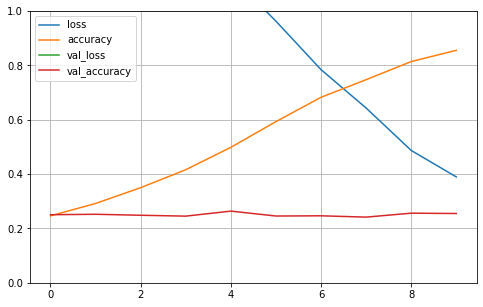

In [90]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

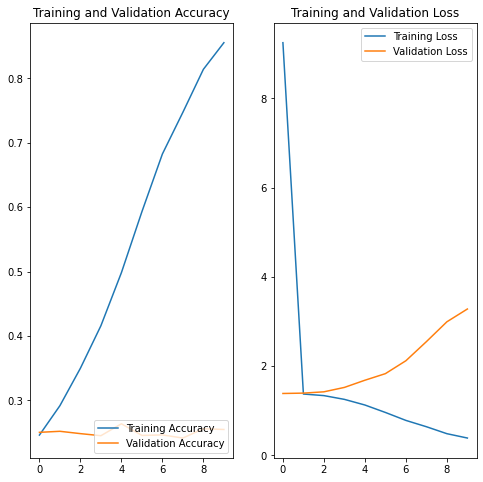

In [91]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Pada hasil plot diatas, Loss menurun terus namun Val Loss nya justru naik terus. Bisa dilihat bahwa model ini overfitting

# Model Improvement

Menggunakan Data Augmentation yaitu dengan cara menambah data training dari data yang ada dengan mentransformasikan data tersebut untuk mengatasi Overfitting

In [92]:
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(im_height, im_width, 3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

## Model 2

In [93]:
def layers2(weight_init=tf.keras.initializers.GlorotNormal(),hidden_act_func='relu'):
  model = keras.models.Sequential()
 
  #input layers
  model.add(data_augmentation)
    
  #hidden layers
  model.add(keras.layers.Conv2D(16, 3, padding='same', kernel_initializer=weight_init, activation=hidden_act_func))
  model.add(keras.layers.MaxPooling2D())
  model.add(keras.layers.Conv2D(32, 3, padding='same', kernel_initializer=weight_init, activation=hidden_act_func))
  model.add(keras.layers.MaxPooling2D())
  model.add(keras.layers.Conv2D(64, 3, padding='same', kernel_initializer=weight_init, activation=hidden_act_func))
  model.add(keras.layers.MaxPooling2D())
  model.add(keras.layers.Dropout(0.2)),
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(128, kernel_initializer=weight_init, activation=hidden_act_func))

  #output layers
  model.add(keras.layers.Dense(len(kelas), activation="softmax"))
  return model

In [94]:
model2 = layers2()
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)       

In [95]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [96]:
history = model2.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
311/311 [==============================] - 105s 339ms/step - loss: 10.6460 - accuracy: 0.2529 - val_loss: 1.3870 - val_accuracy: 0.2505
Epoch 2/10
311/311 [==============================] - 103s 332ms/step - loss: 1.3891 - accuracy: 0.2423 - val_loss: 1.3870 - val_accuracy: 0.2549
Epoch 3/10
311/311 [==============================] - 106s 340ms/step - loss: 1.3882 - accuracy: 0.2568 - val_loss: 1.3870 - val_accuracy: 0.2348
Epoch 4/10
311/311 [==============================] - 107s 344ms/step - loss: 1.3871 - accuracy: 0.2507 - val_loss: 1.3886 - val_accuracy: 0.2380
Epoch 5/10
311/311 [==============================] - 107s 344ms/step - loss: 1.3870 - accuracy: 0.2495 - val_loss: 1.3861 - val_accuracy: 0.2565
Epoch 6/10
311/311 [==============================] - 105s 339ms/step - loss: 1.3875 - accuracy: 0.2468 - val_loss: 1.3872 - val_accuracy: 0.2477
Epoch 7/10
311/311 [==============================] - 106s 340ms/step - loss: 1.3865 - accuracy: 0.2573 - val_loss: 1.3872 

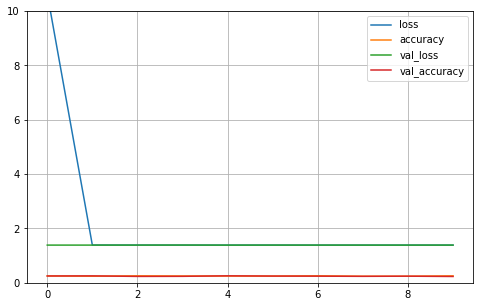

In [97]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
#save_fig("keras_learning_curves_plot")
plt.show()

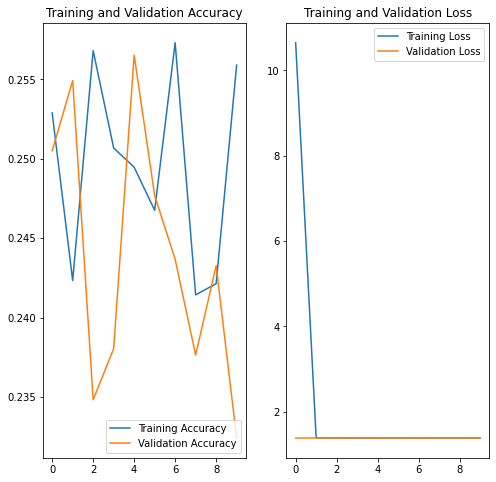

In [98]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model 3

In [99]:
model3 = Sequential([
  data_augmentation,
  keras.layers.Conv2D(16, 3, padding='same', kernel_initializer=tf.keras.initializers.GlorotNormal(), activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', kernel_initializer=tf.keras.initializers.GlorotNormal(), activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', kernel_initializer=tf.keras.initializers.GlorotNormal(), activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(len(kelas), activation="softmax")
])

In [100]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 64)       

In [101]:
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [102]:
history = model3.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
311/311 [==============================] - 110s 355ms/step - loss: 10.2214 - accuracy: 0.2542 - val_loss: 1.3880 - val_accuracy: 0.2485
Epoch 2/10
311/311 [==============================] - 107s 344ms/step - loss: 1.3871 - accuracy: 0.2540 - val_loss: 1.3882 - val_accuracy: 0.2417
Epoch 3/10
311/311 [==============================] - 107s 343ms/step - loss: 1.3892 - accuracy: 0.2491 - val_loss: 1.3894 - val_accuracy: 0.2396
Epoch 4/10
311/311 [==============================] - 105s 339ms/step - loss: 1.3873 - accuracy: 0.2537 - val_loss: 1.3882 - val_accuracy: 0.2312
Epoch 5/10
311/311 [==============================] - 106s 342ms/step - loss: 1.3872 - accuracy: 0.2425 - val_loss: 1.3865 - val_accuracy: 0.2477
Epoch 6/10
311/311 [==============================] - 109s 349ms/step - loss: 1.3870 - accuracy: 0.2417 - val_loss: 1.3869 - val_accuracy: 0.2449
Epoch 7/10
311/311 [==============================] - 108s 347ms/step - loss: 1.3863 - accuracy: 0.2529 - val_loss: 1.3864 

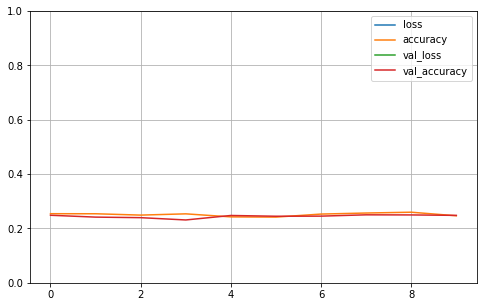

In [103]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

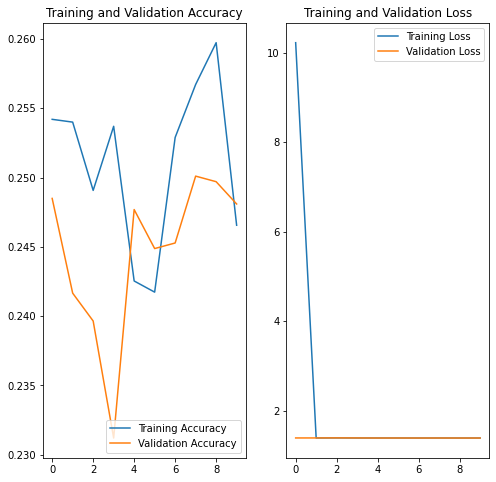

In [104]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model 4

In [161]:
model4 = Sequential([
    data_augmentation,
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu', bias_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(kelas), activation="softmax")
])

In [162]:
model4.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [163]:
history = model4.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
311/311 [==============================] - 111s 358ms/step - loss: 12.3748 - accuracy: 0.2485 - val_loss: 1.3883 - val_accuracy: 0.2348
Epoch 2/10
311/311 [==============================] - 116s 374ms/step - loss: 1.3888 - accuracy: 0.2518 - val_loss: 1.3876 - val_accuracy: 0.2312
Epoch 3/10
311/311 [==============================] - 110s 353ms/step - loss: 1.3873 - accuracy: 0.2539 - val_loss: 1.3886 - val_accuracy: 0.2421
Epoch 4/10
311/311 [==============================] - 106s 340ms/step - loss: 1.3885 - accuracy: 0.2495 - val_loss: 1.3859 - val_accuracy: 0.2642
Epoch 5/10
311/311 [==============================] - 106s 342ms/step - loss: 1.3865 - accuracy: 0.2530 - val_loss: 1.3871 - val_accuracy: 0.2606
Epoch 6/10
311/311 [==============================] - 107s 344ms/step - loss: 1.3867 - accuracy: 0.2505 - val_loss: 1.3867 - val_accuracy: 0.2557
Epoch 7/10
311/311 [==============================] - 106s 341ms/step - loss: 1.3866 - accuracy: 0.2547 - val_loss: 1.3875 

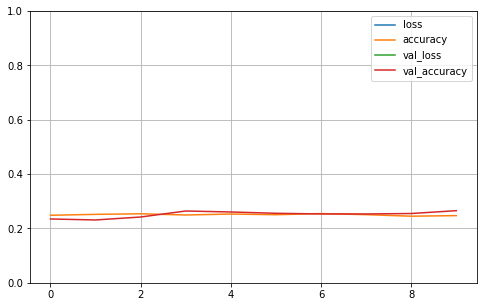

In [164]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

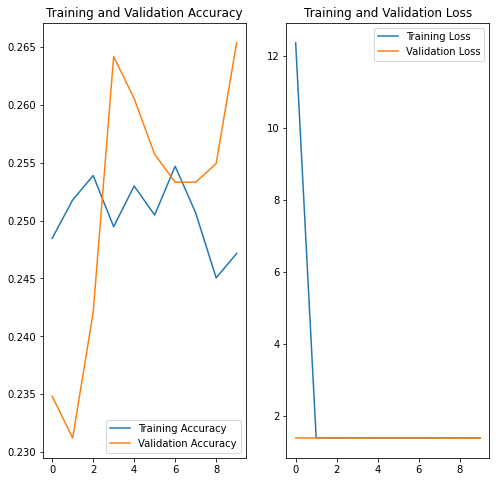

In [165]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model 5

In [174]:
def layers5(weight_init=tf.keras.initializers.GlorotNormal(),hidden_act_func='relu'):
  model = keras.models.Sequential()
 
  #input layers
  model.add(keras.layers.InputLayer(input_shape=(im_height,im_width, 3)))
    
  #hidden layers
  model.add(keras.layers.Conv2D(16, 3, padding='same', kernel_initializer=weight_init, activation=hidden_act_func))
  model.add(keras.layers.MaxPooling2D())
  model.add(keras.layers.Conv2D(32, 3, padding='same', kernel_initializer=weight_init, activation=hidden_act_func))
  model.add(keras.layers.MaxPooling2D())
  model.add(keras.layers.Conv2D(64, 3, padding='same', kernel_initializer=weight_init, activation=hidden_act_func,
                                bias_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
  model.add(keras.layers.MaxPooling2D())
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(128, kernel_initializer=weight_init, activation=hidden_act_func))

  #output layers
  model.add(keras.layers.Dense(len(kelas), activation="softmax"))
  return model

In [175]:
model5=layers5()

In [176]:
model5.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [177]:
history = model5.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
311/311 [==============================] - 95s 306ms/step - loss: 5.1189 - accuracy: 0.2544 - val_loss: 1.3863 - val_accuracy: 0.2517
Epoch 2/10
311/311 [==============================] - 95s 305ms/step - loss: 1.3748 - accuracy: 0.2965 - val_loss: 1.3954 - val_accuracy: 0.2425
Epoch 3/10
311/311 [==============================] - 95s 306ms/step - loss: 1.3373 - accuracy: 0.3525 - val_loss: 1.4282 - val_accuracy: 0.2513
Epoch 4/10
311/311 [==============================] - 95s 305ms/step - loss: 1.2592 - accuracy: 0.4127 - val_loss: 1.5774 - val_accuracy: 0.2541
Epoch 5/10
311/311 [==============================] - 95s 305ms/step - loss: 1.1291 - accuracy: 0.5044 - val_loss: 1.7371 - val_accuracy: 0.2380
Epoch 6/10
311/311 [==============================] - 96s 309ms/step - loss: 0.9767 - accuracy: 0.5871 - val_loss: 1.8461 - val_accuracy: 0.2380
Epoch 7/10
311/311 [==============================] - 92s 297ms/step - loss: 0.7931 - accuracy: 0.6774 - val_loss: 2.1996 - val_ac

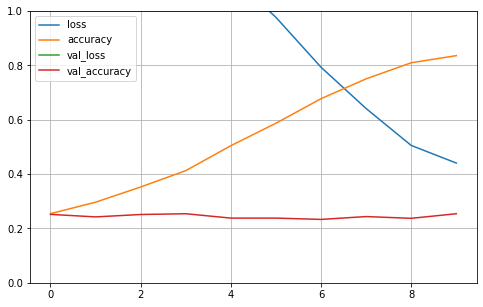

In [178]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

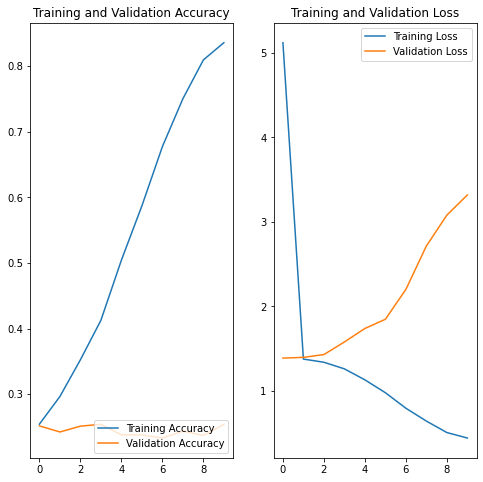

In [179]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model 6

In [183]:
def layers6(weight_init=tf.keras.initializers.GlorotNormal(),hidden_act_func='relu'):
  model = keras.models.Sequential()
  
  model.add(data_augmentation)
  model.add(keras.layers.InputLayer(input_shape=(im_height,im_width, 3)))
    
  #hidden layers
  model.add(keras.layers.Conv2D(16, 3, padding='same', kernel_initializer=weight_init, activation=hidden_act_func))
  model.add(keras.layers.MaxPooling2D())
  model.add(keras.layers.Conv2D(32, 3, padding='same', kernel_initializer=weight_init, activation=hidden_act_func))
  model.add(keras.layers.MaxPooling2D())
  model.add(keras.layers.Conv2D(64, 3, padding='same', kernel_initializer=weight_init, activation=hidden_act_func,
                                bias_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
  model.add(keras.layers.MaxPooling2D())
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(128, kernel_initializer=weight_init, activation=hidden_act_func))

  #output layers
  model.add(keras.layers.Dense(len(kelas), activation="softmax"))
  return model

In [184]:
model6=layers6()

In [185]:
model6.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [186]:
history = model6.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
311/311 [==============================] - 104s 336ms/step - loss: 25.3174 - accuracy: 0.2538 - val_loss: 1.3910 - val_accuracy: 0.2473
Epoch 2/10
311/311 [==============================] - 102s 328ms/step - loss: 1.3895 - accuracy: 0.2474 - val_loss: 1.3906 - val_accuracy: 0.2437
Epoch 3/10
311/311 [==============================] - 102s 329ms/step - loss: 1.3880 - accuracy: 0.2547 - val_loss: 1.3880 - val_accuracy: 0.2437
Epoch 4/10
311/311 [==============================] - 103s 332ms/step - loss: 1.3874 - accuracy: 0.2520 - val_loss: 1.3874 - val_accuracy: 0.2533
Epoch 5/10
311/311 [==============================] - 103s 332ms/step - loss: 1.3872 - accuracy: 0.2446 - val_loss: 1.3882 - val_accuracy: 0.2405
Epoch 6/10
311/311 [==============================] - 103s 330ms/step - loss: 1.3867 - accuracy: 0.2553 - val_loss: 1.3870 - val_accuracy: 0.2380
Epoch 7/10
311/311 [==============================] - 102s 329ms/step - loss: 1.3871 - accuracy: 0.2525 - val_loss: 1.3867 

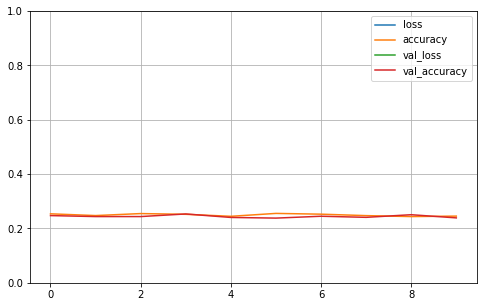

In [187]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

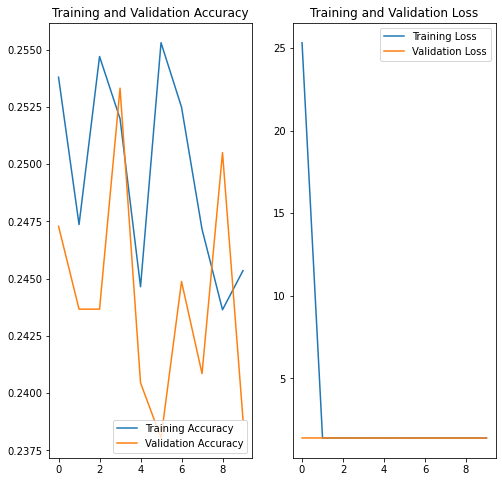

In [188]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model 7


In [193]:
def layers7(weight_init=tf.keras.initializers.GlorotNormal(),hidden_act_func='relu'):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=(im_height,im_width, 3)))
    
  #hidden layers
  model.add(keras.layers.Conv2D(16, 3, padding='same', kernel_initializer=weight_init, activation=hidden_act_func))
  model.add(keras.layers.MaxPooling2D())
  model.add(keras.layers.Conv2D(32, 3, padding='same', kernel_initializer=weight_init, activation=hidden_act_func))
  model.add(keras.layers.MaxPooling2D())
  model.add(keras.layers.Conv2D(64, 3, padding='same', kernel_initializer=weight_init, activation=hidden_act_func,
                                bias_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
  model.add(keras.layers.MaxPooling2D())
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(128, kernel_initializer=weight_init, activation=hidden_act_func))

  #output layers
  model.add(keras.layers.Dense(len(kelas), activation="softmax"))
  return model

In [194]:
model7=layers7()
model7.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [195]:
history = model7.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
311/311 [==============================] - 112s 362ms/step - loss: 12.1233 - accuracy: 0.2484 - val_loss: 1.3898 - val_accuracy: 0.2509
Epoch 2/10
311/311 [==============================] - 109s 352ms/step - loss: 1.3793 - accuracy: 0.2877 - val_loss: 1.3970 - val_accuracy: 0.2598
Epoch 3/10
311/311 [==============================] - 110s 354ms/step - loss: 1.3574 - accuracy: 0.3267 - val_loss: 1.4120 - val_accuracy: 0.2461
Epoch 4/10
311/311 [==============================] - 108s 348ms/step - loss: 1.3183 - accuracy: 0.3692 - val_loss: 1.4537 - val_accuracy: 0.2481
Epoch 5/10
311/311 [==============================] - 109s 351ms/step - loss: 1.2692 - accuracy: 0.4093 - val_loss: 1.4911 - val_accuracy: 0.2364
Epoch 6/10
311/311 [==============================] - 109s 350ms/step - loss: 1.2112 - accuracy: 0.4474 - val_loss: 1.4694 - val_accuracy: 0.3084
Epoch 7/10
311/311 [==============================] - 109s 350ms/step - loss: 1.1536 - accuracy: 0.4848 - val_loss: 1.6652 

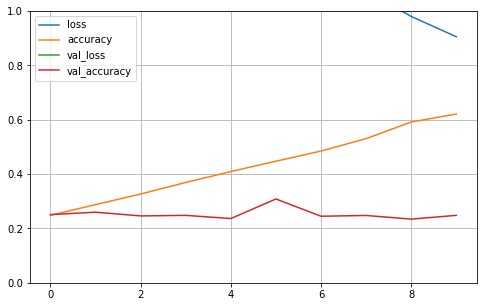

In [196]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

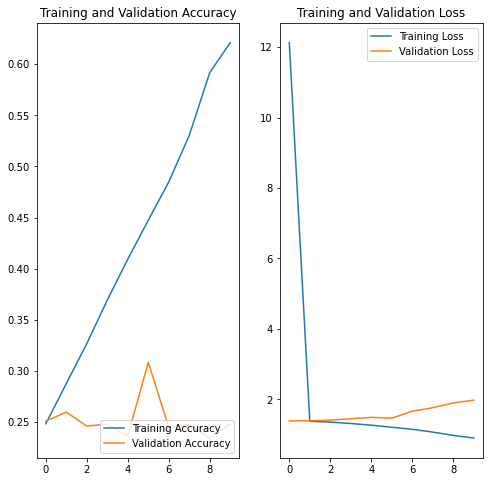

In [197]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model Evaluaiton

In [142]:
test_dataset = image_dataset_from_directory(
    test,
    shuffle=True,
    image_size=(im_height, im_width)
    )

Found 71 files belonging to 4 classes.


In [144]:
Model_Results = model.evaluate(test_dataset)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

3/3 [==============================] - 0s 25ms/step - loss: 1.4419 - accuracy: 0.0563
LOSS:  1.4419
ACCURACY:  0.06


In [145]:
Model_Results = model2.evaluate(test_dataset)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

3/3 [==============================] - 0s 25ms/step - loss: 1.3855 - accuracy: 0.1831
LOSS:  1.3855
ACCURACY:  0.18


In [146]:
Model_Results = model3.evaluate(test_dataset)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

3/3 [==============================] - 0s 26ms/step - loss: 1.3835 - accuracy: 0.1831
LOSS:  1.3835
ACCURACY:  0.18


In [166]:
Model_Results = model4.evaluate(test_dataset)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

3/3 [==============================] - 0s 24ms/step - loss: 1.3868 - accuracy: 0.1831
LOSS:  1.3868
ACCURACY:  0.18


In [180]:
Model_Results = model5.evaluate(test_dataset)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

3/3 [==============================] - 0s 23ms/step - loss: 1.3667 - accuracy: 0.0563
LOSS:  1.3667
ACCURACY:  0.06


In [190]:
Model_Results = model6.evaluate(test_dataset)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

3/3 [==============================] - 0s 23ms/step - loss: 1.3893 - accuracy: 0.1831
LOSS:  1.3893
ACCURACY:  0.18


In [198]:
Model_Results = model7.evaluate(test_dataset)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

3/3 [==============================] - 0s 24ms/step - loss: 1.3412 - accuracy: 0.6761
LOSS:  1.3412
ACCURACY:  0.68


# Model Inference

In [136]:
test_image = r'C:\Users\haika\HACKTIV8\Milestone 2 phase 2\dataset2-master\dataset2-master\images\INFERENCE\_74_9751.jpeg'

img = keras.preprocessing.image.load_img(
    test_image, target_size=(im_height, im_width)
)

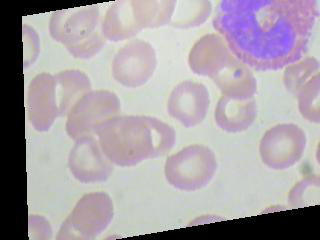

In [137]:
PIL.Image.open(test_image)

Saya akan mengulangi lagi hasil dari EDA untuk melihat lagi karakteristik setiap sel:

1. Dari yang saya lihat, karakteristik EOSINOPHIL ini dikelilingi oleh seldarah merah. Jadi kalo dilihat digambar, selain berwarna biru juga bercampur dengan warna merah

2. Karakteristik dari LYMPHOCYTE ini dipenuhi oleh warna biru

3. Karakteristik dari MONOCYTE yaitu dia memiliki inti sel. Pada gambar diatas inti sel tersebut berwarna biru

4. NEUTROPHIL memiliki karakteristik di mana NEUTROPHIL memiliki tiga lobus nukleus.

Dari karakteristik setiap sel, bisa disimpulkan bahwa gambar diatas EOSINOPHIL. Sekarang mari kita coba predict masing2 model untuk mencari mana yang prediksi nya lebih benar

In [148]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "The class of this images is likely belongs to {} with a {:.2f} percent confidence."
    .format(kelas[np.argmax(score)], 100 * np.max(score))
)

The class of this images is likely belongs to EOSINOPHIL with a 47.18 percent confidence.


In [149]:
predictions = model2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "The class of this images is likely belongs to {} with a {:.2f} percent confidence."
    .format(kelas[np.argmax(score)], 100 * np.max(score))
)

The class of this images is likely belongs to MONOCYTE with a 25.24 percent confidence.


In [150]:
predictions = model3.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "The class of this images is likely belongs to {} with a {:.2f} percent confidence."
    .format(kelas[np.argmax(score)], 100 * np.max(score))
)

The class of this images is likely belongs to EOSINOPHIL with a 25.11 percent confidence.


In [167]:
predictions = model4.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "The class of this images is likely belongs to {} with a {:.2f} percent confidence."
    .format(kelas[np.argmax(score)], 100 * np.max(score))
)

The class of this images is likely belongs to LYMPHOCYTE with a 25.04 percent confidence.


In [181]:
predictions = model5.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "The class of this images is likely belongs to {} with a {:.2f} percent confidence."
    .format(kelas[np.argmax(score)], 100 * np.max(score))
)

The class of this images is likely belongs to EOSINOPHIL with a 41.71 percent confidence.


In [199]:
predictions = model6.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "The class of this images is likely belongs to {} with a {:.2f} percent confidence."
    .format(kelas[np.argmax(score)], 100 * np.max(score))
)

The class of this images is likely belongs to LYMPHOCYTE with a 25.06 percent confidence.


In [200]:
predictions = model7.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "The class of this images is likely belongs to {} with a {:.2f} percent confidence."
    .format(kelas[np.argmax(score)], 100 * np.max(score))
)

The class of this images is likely belongs to LYMPHOCYTE with a 29.83 percent confidence.


Bisa disimpulkan bahwa model pertama justru bisa memprediksi dengan akurasi tertinggi tetapi itupun masih rendah yaitu tidak sampai 50%. Model7, dengan hasil evaluasi, akurasi nya lebih tinggi dari yang lain, namun ketika di inference salah memprediksi kelas. Saya menyimpulkan bahwa cara yang saya gunakan tidak cocok untuk mengklasifikasikan gambar sel darah, karena cara ini mempelajari seluruh bagian dari gambar. Seharusnya yang dipelajari hanya bagian sel darah putihnya saja, sementara yang ini cara ini juga mempelajari sel darah merah yang ada disekitaran sel darah putih tersebut. Saya juga berpikir bahwa saya juga seharusnya mengklasifikasikan semua sel yang ada pada gambar termasuk sel darah merah.

# Kesimpulan

**EDA**
1. Karakteristik EOSINOPHIL ini dikelilingi oleh seldarah merah. Jadi kalo dilihat digambar, selain berwarna biru juga bercampur dengan warna merah

2. Karakteristik dari LYMPHOCYTE ini dipenuhi oleh warna biru

3. Karakteristik dari MONOCYTE yaitu dia memiliki inti sel. Pada gambar diatas inti sel tersebut berwarna biru

4. NEUTROPHIL memiliki karakteristik di mana NEUTROPHIL memiliki tiga lobus nukleus.

**Model**

Setiap model yang saya test terindikasi adanya Overfitting. Dari hasil evaluation, model7 memiliki akurasi tertinggi dengan akurasi 0.6761. Dari hasil inference, bisa disimpulkan bahwa model pertama justru bisa memprediksi dengan akurasi tertinggi tetapi itupun masih rendah yaitu tidak sampai 50%. Saya menyimpulkan bahwa cara yang saya gunakan tidak cocok untuk mengklasifikasikan gambar sel darah, karena cara ini mempelajari seluruh bagian dari gambar. Seharusnya yang dipelajari hanya bagian sel darah putihnya saja, sementara yang ini cara ini juga mempelajari sel darah merah yang ada disekitaran sel darah putih tersebut. Saya juga berpikir bahwa saya juga seharusnya mengklasifikasikan semua sel yang ada pada gambar termasuk sel darah merah.